# Synthetic Data

In [1]:
import numpy as np;
import scipy as sp;
A = np.random.normal(0,1,(3,2));
print("The shape of A is ",np.shape(A));

The shape of A is  (3, 2)


### Generation of Dataset #1

In [2]:
print("Concatenating 500 samples of {x_i=Av_i} is equivalent to {X=AV}, where V is in R^{2x500} iid Gaussian");
from numpy import linalg as la;
V = np.random.normal(0,1,(2,500));
X = np.matmul(A,V);
print("The shape of X is ",la.matrix_rank(X));
print("The rank of X is ",la.matrix_rank(X));

Concatenating 500 samples of {x_i=Av_i} is equivalent to {X=AV}, where V is in R^{2x500} iid Gaussian
The shape of X is  2
The rank of X is  2


### Singular Value and Eigenvalue Decomposition of Dataset #1

In [3]:
XXt = np.matmul(X,np.transpose(X));
U,S,Vt = la.svd(X);
Eval,Evec = la.eig(XXt);
print("The left singular vectors are ");
print(U);
print("The eigenvectors of XXt are ");
print(Evec);
print("The column vectors are the same, up to rearrangement and multiplication by -1, both of which preserve the structure.");
print("The squares of the singular values are ");
print(np.square(S));
print("The eigenvalues are ");
print(Eval);
print("The two larger eigenvalues match with the squares of the two larger singular values. The smallest eigenvalue and singular value are both 0, and 0^2=0.");
print("The square of the norm of X is ",np.square(la.norm(X)));
print("The sum of the squares of the singular values are ",np.sum(np.square(S)));
print("These values match as well.");


The left singular vectors are 
[[-0.13131027  0.6865135   0.7151621 ]
 [-0.99062945 -0.06353408 -0.12089961]
 [-0.03756205 -0.724336    0.68842316]]
The eigenvectors of XXt are 
[[-0.13131027 -0.7151621  -0.6865135 ]
 [-0.99062945  0.12089961  0.06353408]
 [-0.03756205 -0.68842316  0.724336  ]]
The column vectors are the same, up to rearrangement and multiplication by -1, both of which preserve the structure.
The squares of the singular values are 
[1.24375736e+03 8.66598436e+01 2.05299205e-30]
The eigenvalues are 
[ 1.24375736e+03 -4.78182885e-15  8.66598436e+01]
The two larger eigenvalues match with the squares of the two larger singular values. The smallest eigenvalue and singular value are both 0, and 0^2=0.
The square of the norm of X is  1330.4172073210768
The sum of the squares of the singular values are  1330.4172073210766
These values match as well.


The smallest singular value isn't exactly zero due to floating-point precision error, when the SVD is computed algorithmically. Because the values of X were generated using random Gaussian floats, computations with them require high precision and are prone to rounding errors.

The left singular vectors of X corresponding to the two largest singular values and the columns of A are bases of the same plane in R^3. This follows from A having the same span as X (due to how X is generated), as well as the principal vectors of U having the same span as X. Because X has rank 2, a basis of the span only requires two vectors. Thus, computing the SVD of X allows us to determine the span of A without knowing A or V.

### PCA of Dataset #1

We only need two principal components to capture all the variation in the data. This is because the data has dimension (rank) 2, so only two parameters are necessary to describe any data point.

$E[x_k]=E[A_{k1}*v_{x1}+A_{k2}*v_{x2}]$, where $v_x$ is the v that generated x.  
$E[A_{k1}*v_{x1}+A_{k2}*v_{x2}]=E[A_{k1}]*E[v_{x1}]+E[A_{k2}]*E[v_{x2}]$, because every random variable is iid.  
$E[A_{k1}]*E[v_{x1}]+E[A_{k2}]*E[v_{x2}]=0*0+0*0=0$, because every random variable has mean 0.

In [4]:
print(X.mean(1));
print("These values are sufficiently small.");

[ 0.03781303  0.02669939 -0.03459282]
These values are sufficiently small.


In [5]:
print("The third singular value is 0, so we just take the first two singular vectors, which are already normalized in U.");
Us = U[:,0:2];
print(Us);

The third singular value is 0, so we just take the first two singular vectors, which are already normalized in U.
[[-0.13131027  0.6865135 ]
 [-0.99062945 -0.06353408]
 [-0.03756205 -0.724336  ]]


In [6]:
Xtild = np.matmul(np.transpose(Us),X);
Xrec = np.matmul(Us,Xtild);
error = np.square(la.norm(Xrec-X));
print("The error using two principal components is ",error);
print("This is small enough for all practical purposes.");

The error using two principal components is  5.594218692037861e-29
This is small enough for all practical purposes.


In [7]:
print("Reminder: the singular values are ",S);
print("The first singular value is larger than the second, so we use the first singular vector.");
Us1 = np.reshape(np.asmatrix(Us[:,0]),(3,1));
Xtild1 = np.matmul(np.transpose(Us1),X);
Xrec1 = np.matmul(Us1,Xtild1);
error1 = np.square(la.norm(Xrec1-X));
print("The error using one principal component is ", error1);
print("This is equal to the square of the second principal component, ",np.square(S[1]));

Reminder: the singular values are  [3.52669443e+01 9.30912690e+00 1.43282659e-15]
The first singular value is larger than the second, so we use the first singular vector.
The error using one principal component is  86.65984358463844
This is equal to the square of the second principal component,  86.65984358463847


In [8]:
import matplotlib.pyplot as plt;
from mpl_toolkits.mplot3d import Axes3D
print("This is the scatter plot of the original data samples:");
fig = plt.figure();
ax = fig.add_subplot(111, projection='3d');
ax.scatter(X[0,:], X[1,:], X[2,:], zdir='z', s=20, c=None, depthshade=True);
print("This is the scatter plot of the reconstructed data samples:");
fig2 = plt.figure();
ax2 = fig2.add_subplot(111, projection='3d');
ax2.scatter(Xrec1[0,:], Xrec1[1,:], Xrec1[2,:], zdir='z', s=20, c=None, depthshade=True);

This is the scatter plot of the original data samples:
This is the scatter plot of the reconstructed data samples:


### Generation of Dataset #2

In [9]:
c = np.random.normal(0,3,(3,1));
print("Concatenating 500 samples of {x_i=Av_i+c} is equivalent to {X=AV+C}, where V is in R^{2x500} iid Gaussian, and C is 500 copies of the column vector c.");
V = np.random.normal(0,1,(2,500));
C = np.repeat(c,500,axis=1);
X = np.matmul(A,V) + C;
print(C);
print("The shape of X is ",np.shape(X));
print("The rank of X is ",la.matrix_rank(X));
print("The rank of X would only not increase if c is in the span of A, which would occur almost never in a random distribution.");

Concatenating 500 samples of {x_i=Av_i+c} is equivalent to {X=AV+C}, where V is in R^{2x500} iid Gaussian, and C is 500 copies of the column vector c.
[[ 2.16374618  2.16374618  2.16374618 ...  2.16374618  2.16374618
   2.16374618]
 [-2.40561036 -2.40561036 -2.40561036 ... -2.40561036 -2.40561036
  -2.40561036]
 [ 0.65155897  0.65155897  0.65155897 ...  0.65155897  0.65155897
   0.65155897]]
The shape of X is  (3, 500)
The rank of X is  3
The rank of X would only not increase if c is in the span of A, which would occur almost never in a random distribution.


### PCA, Centering, and Dataset #2

In [10]:
U,S,Vt = la.svd(X);
print("The singular values of X are: ",S);
print("The first two largest eigenvalues are the largest, so we drop the last vector.");
Us = U[:,0:2];
print("The top two principal components are:");
print(Us);
Xrec = np.matmul(Us,np.matmul(np.transpose(Us),X));
error = np.square(la.norm(Xrec-X));
print("The error (without preprocessing) is ",error,">> 0");

The singular values of X are:  [78.30518677 26.29265316  8.05709966]
The first two largest eigenvalues are the largest, so we drop the last vector.
The top two principal components are:
[[-0.5686092  -0.78773286]
 [ 0.80582532 -0.59128922]
 [-0.16531523 -0.17278308]]
The error (without preprocessing) is  64.91685492387349 >> 0


In [11]:
meanv = np.repeat(np.reshape(np.asmatrix(X.mean(1)),(3,1)),500,axis=1);
Xc = X-meanv;
U,S,Vt = la.svd(Xc);
print("The singular values of the centered X are: ",S);
print("The first two largest eigenvalues are the largest, so we drop the last vector.");
Us = U[:,0:2];
print("The top two principal components are:");
print(Us);
Xrec = np.matmul(Us,np.matmul(np.transpose(Us),Xc)) + meanv;
error = np.square(la.norm(Xrec-X));
print("The error (without preprocessing) is ",error,"~ 0");

The singular values of the centered X are:  [3.52885490e+01 9.19292803e+00 5.97611347e-15]
The first two largest eigenvalues are the largest, so we drop the last vector.
The top two principal components are:
[[-0.14078282  0.68463375]
 [-0.98965709 -0.07721485]
 [-0.02755081 -0.72478583]]
The error (without preprocessing) is  3.877960091380807e-28 ~ 0


### Generation of Dataset #3

In [12]:
V = np.random.normal(0,1,(2,500));
N = np.random.normal(0,0.01,(3,500));
X = np.matmul(A,V) + N;
for x in range(0,500):
    norm = la.norm(X[:,x]);
    X[:,x] = X[:,x]/norm;
print("The rank of X-hat is ",la.matrix_rank(X));
U,S,Vt = la.svd(X);
print("The singular values of X-hat are: ",S);
print("Note that none of the singular values are basically zero.");

The rank of X-hat is  3
The singular values of X-hat are:  [19.83013088 10.32365133  0.43374265]
Note that none of the singular values are basically zero.


### PCA Denoising of Dataset #3

This is the scatter plot of the normalized data samples:


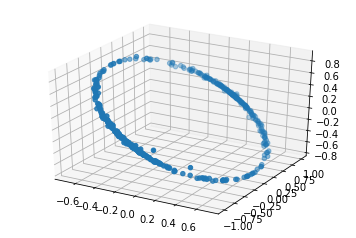

In [13]:
print("This is the scatter plot of the normalized data samples:");
fig = plt.figure();
ax = fig.add_subplot(111, projection='3d');
ax.scatter(X[0,:], X[1,:], X[2,:], zdir='z', s=20, c=None, depthshade=True);

This is the scatter plot of the denoised data samples:


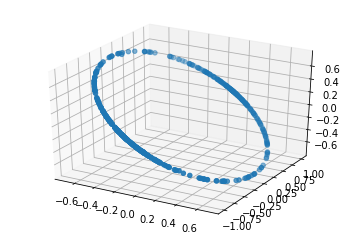

In [14]:
Us = U[:,0:2];
Xden = np.matmul(Us,np.matmul(np.transpose(Us),X));
print("This is the scatter plot of the denoised data samples:");
fig = plt.figure();
ax = fig.add_subplot(111, projection='3d');
ax.scatter(Xden[0,:], Xden[1,:], Xden[2,:], zdir='z', s=20, c=None, depthshade=True);

In [15]:
error = np.square(la.norm(Xden-X));
print("The error from denoising is ",error);
print("This is equal to the square of the smallest singular value of X: ",np.square(S[2]));

The error from denoising is  0.18813268339490874
This is equal to the square of the smallest singular value of X:  0.18813268339490863


# Real Data

This is a sample image from the dataset:


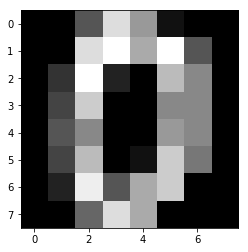

In [16]:
from sklearn.datasets import load_digits;
images, labels = load_digits(1, return_X_y=True);
images = np.transpose(images);
print("This is a sample image from the dataset:");
plt.imshow(np.reshape(np.asmatrix(images[:,0]),(8,8)),cmap='gray');

This is a depiction of the mean of the dataset:


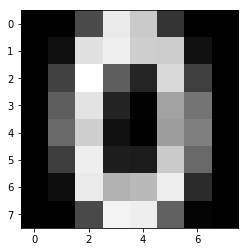

In [17]:
mean = np.reshape(np.asmatrix(images.mean(1)),(64,1));
meanv = np.repeat(mean,178,axis=1);
Xc = images-meanv;
print("This is a depiction of the mean of the dataset:");
plt.imshow(np.reshape(mean,(8,8)),cmap='gray');

Semilog plot of ordered singular values:
The smallest k that satisfies the summation inequality is  18


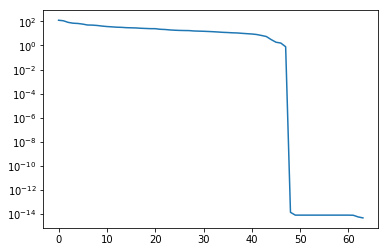

In [18]:
U,S,Vt = la.svd(Xc);
print("Semilog plot of ordered singular values:");
plt.semilogy(np.arange(0,64),S);
energylim = 0.90*np.square(la.norm(Xc));
sqsum = 0;
k = 0;
while sqsum <= energylim:
    sqsum += np.square(S[k]);
    k += 1;
print("The smallest k that satisfies the summation inequality is ",k);

This is a depiction of the first principal component of the dataset:


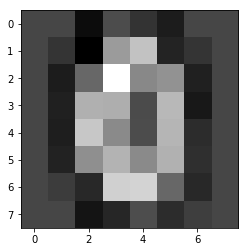

In [19]:
Us = U[:,0:18];
print("This is a depiction of the first principal component of the dataset:");
plt.imshow(np.reshape(Us[:,0],(8,8)),cmap='gray');

This is the scatter plot of the feature vectors:


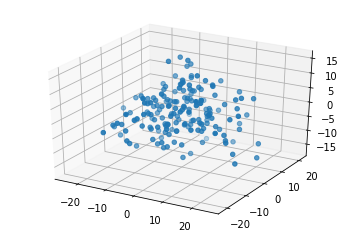

In [20]:
U3 = U[:,0:3];
Xfeat = np.matmul(np.transpose(U3),Xc);
print("This is the scatter plot of the feature vectors:");
fig = plt.figure();
ax = fig.add_subplot(111, projection='3d');
ax.scatter(Xfeat[0,:], Xfeat[1,:], Xfeat[2,:], zdir='z', s=20, c=None, depthshade=True);

In [21]:
Xrec = np.matmul(U3,Xfeat) + meanv;
error = np.square(la.norm(Xrec-images));
print("The representation error between the reconstructed and original images is ",error);
print("This error equals the sum of the squares of the singular values whose corresponding singular vectors were removed.");

The representation error between the reconstructed and original images is  36050.010605737116
This error equals the sum of the squares of the singular values whose corresponding singular vectors were removed.


$$\text{Error}=\sum_{i=4}^{64} \sigma_i^2$$

This is a reconstruction of the sample image from the first part:


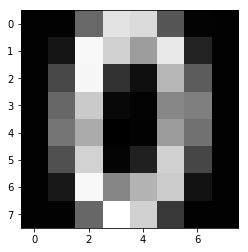

In [22]:
print("This is a reconstruction of the sample image from the first part:");
plt.imshow(np.reshape(Xrec[:,0],(8,8)),cmap='gray');